In [1]:
from hmmlearn import hmm
import datetime
import numpy as np
from matplotlib import cm, pyplot as plt
import matplotlib.dates as dates
import pandas as pd
import seaborn as sns
sns.set_style('white')

from scipy import stats #box-cox
from sklearn import preprocessing
import warnings
warnings.filterwarnings('ignore')

In [2]:
data=pd.read_csv("hs300.csv")
print(data.head())
len(data)
data['date']=pd.to_datetime(data.date)

   instrument       date    open    high     low   close     volume  \
0  000300.SHA   2005/1/6  993.33  993.79  980.33  983.17  628802900   
1  000300.SHA   2005/1/7  983.04  995.71  979.81  983.96  729869400   
2  000300.SHA  2005/1/10  983.76  993.96  979.79  993.88  579169800   
3  000300.SHA  2005/1/11  994.19  999.55  991.09  997.13  584908000   
4  000300.SHA  2005/1/12  996.65  996.98  989.26  996.75  501452500   

         amount    ChgPct  
0  3.921015e+09 -0.946035  
1  4.737469e+09  0.079742  
2  3.762933e+09  1.008275  
3  3.704077e+09  0.327605  
4  3.093300e+09 -0.038811  


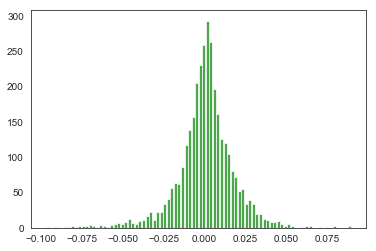

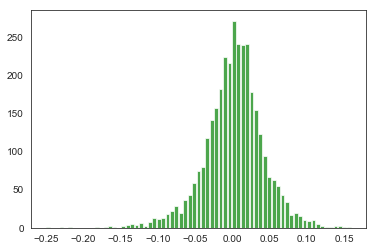

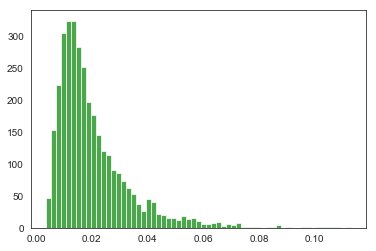

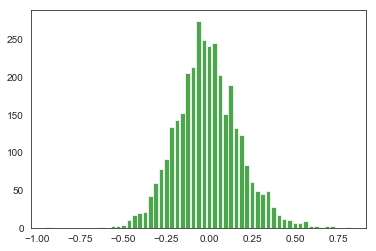

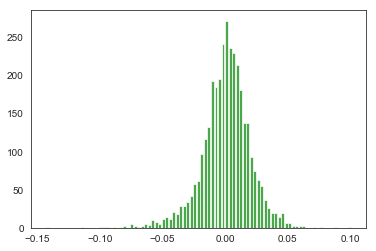

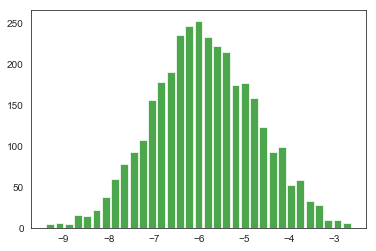

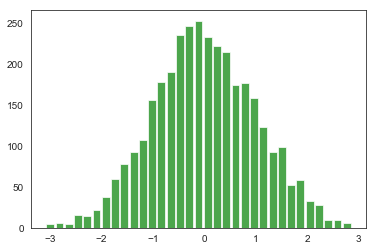

In [3]:
logreturn = np.array(np.diff(np.log(data['close'])))[4:]
logreturn5 = np.log(np.array(data['close'][5:]))-np.log(np.array(data['close'][:-5]))
logdiff = (np.log(np.array(data['high']))-np.log(np.array(data['low'])))[5:]
vma5 = (np.log(np.array(data.volume))-np.log(np.array((data.volume.rolling(5).mean()))))[5:]
bias5=(np.log(np.array(data.close))-np.log(np.array((data.close.rolling(5).mean()))))[5:]
plt.hist(x=logreturn, bins='auto', color='green', alpha=0.7, rwidth=0.85)
plt.show()
plt.hist(x=logreturn5, bins='auto', color='green', alpha=0.7, rwidth=0.85)
plt.show()
plt.hist(x=logdiff, bins='auto', color='green', alpha=0.7, rwidth=0.85)
plt.show()
plt.hist(x=vma5, bins='auto', color='green', alpha=0.7, rwidth=0.85)
plt.show()
plt.hist(x=bias5, bins='auto', color='green', alpha=0.7, rwidth=0.85)
plt.show()

logdiff, _ = stats.boxcox(logdiff)
#plt.hist(x=logreturn, bins='auto', color='green', alpha=0.7, rwidth=0.85)
plt.hist(x=logdiff, bins='auto', color='green', alpha=0.7, rwidth=0.85)
plt.show()
scale_logdiff = preprocessing.scale(logdiff, axis=0, with_mean=True, with_std=True, copy=False)
plt.hist(x=scale_logdiff, bins='auto', color='green', alpha=0.7, rwidth=0.85)
plt.show()
X = np.column_stack([logreturn,scale_logdiff,logreturn5,vma5,bias5])

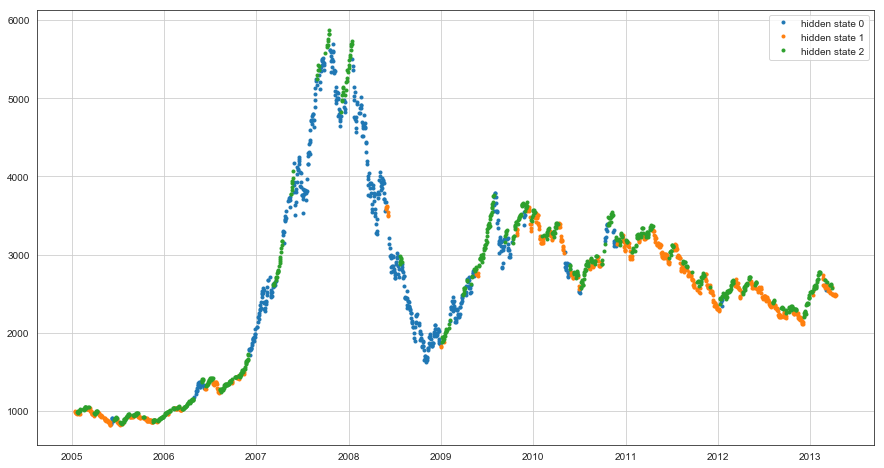

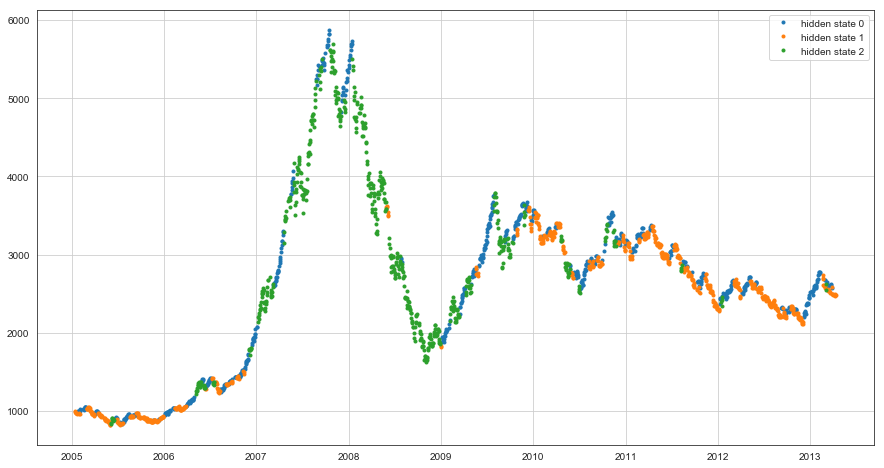

In [4]:
m0=2000
X1 = np.column_stack([logreturn,scale_logdiff,logreturn5,vma5])[0:m0]
model1 = hmm.GaussianHMM(n_components = 3, covariance_type='full',n_iter = 1000).fit(X1)
trian1_states = model1.predict(X1)

datelist=data['date'][5:5+m0]
closeidx=data['close'][5:5+m0]

plt.figure(figsize = (15, 8))
for i in range(model1.n_components):
    state = (trian1_states == i)
    plt.plot_date(datelist[state],closeidx[state],'.',label = 'hidden state %d'%i,lw = 2)
    plt.legend()
    plt.grid(1)

X2 = np.column_stack([logreturn,scale_logdiff,logreturn5,vma5,bias5])[0:m0]

model2 = hmm.GaussianHMM(n_components = 3, covariance_type='full',n_iter = 1000).fit(X2)
trian2_states = model2.predict(X2)

plt.figure(figsize=(15,8)) 
for i in range(model2.n_components):
    state = (trian2_states==i)
    plt.plot_date(datelist[state],closeidx[state],'.',label='hidden state %d'%i,lw=2)
    plt.legend()
    plt.grid(1)

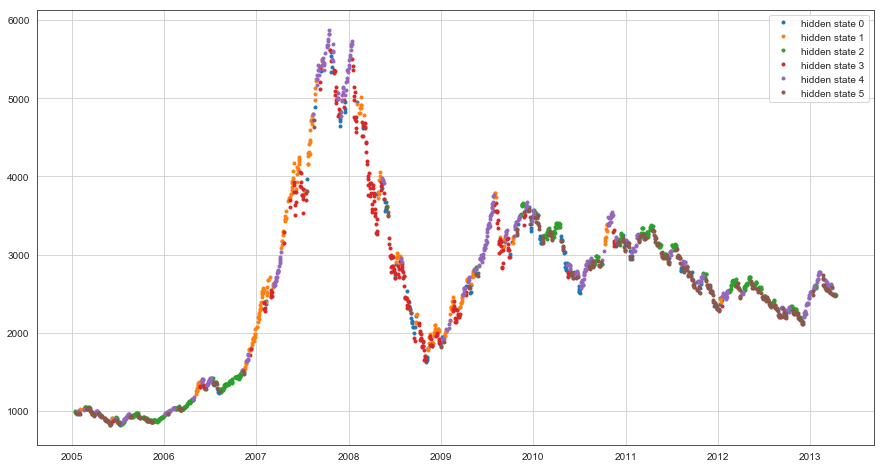

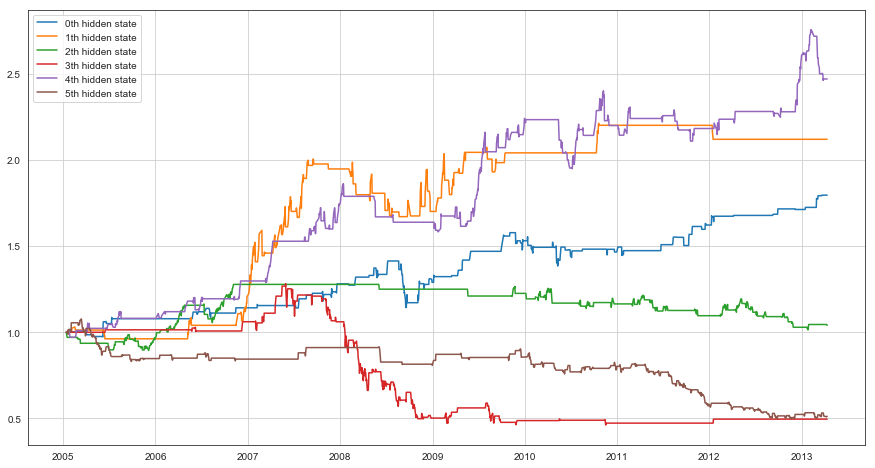

In [5]:
model3 = hmm.GaussianHMM(n_components =6, covariance_type='full',n_iter = 1000).fit(X2)
trian3_states = model3.predict(X2)

plt.figure(figsize=(15, 8)) 
for i in range(model3.n_components):
    state = (trian3_states==i)
    plt.plot_date(datelist[state],closeidx[state],'.',label='hidden state %d'%i,lw=2)
    plt.legend()
    plt.grid(1)

res = pd.DataFrame({'datelist':datelist,'logreturn':logreturn[0:m0],'state':trian3_states}).set_index('datelist')
plt.figure(figsize=(15, 8)) 
for i in range(model3.n_components):
    idx = (trian3_states==i)
    idx = np.append(0,idx[:-1])
    df = res.logreturn
    res['sig_ret%s'%i] = df.multiply(idx,axis=0)
    plt.plot(np.exp(res['sig_ret%s'%i].cumsum()),label='%dth hidden state'%i)
    plt.legend()
    plt.grid(1)

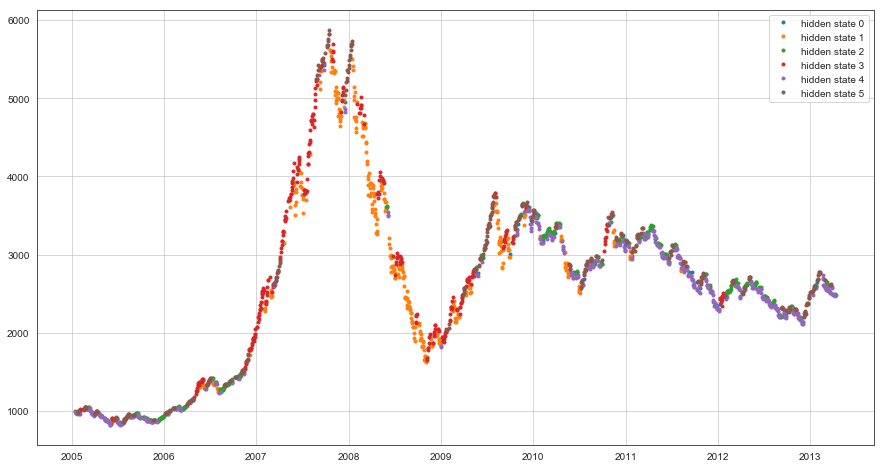

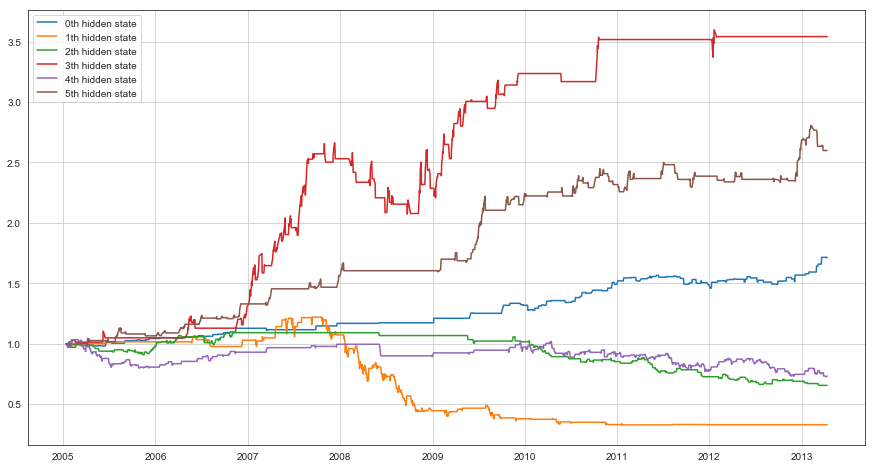

In [6]:
model4 = hmm.GMMHMM(n_components = 6, covariance_type='full',n_iter = 1000).fit(X2)
trian4_states = model4.predict(X2)


plt.figure(figsize = (15, 8))
for i in range(model4.n_components):
    state = (trian4_states == i)
    plt.plot_date(datelist[state],closeidx[state],'.',label = 'hidden state %d'%i,lw = 2)
    plt.legend()
    plt.grid(1)

res = pd.DataFrame({'datelist':datelist,'logreturn':logreturn[0:m0],'state':trian4_states}).set_index('datelist')
plt.figure(figsize=(15, 8)) 
for i in range(model4.n_components):
    idx = (trian4_states==i)
    idx = np.append(0,idx[:-1])
    df = res.logreturn
    res['sig_ret%s'%i] = df.multiply(idx,axis=0)
    plt.plot(np.exp(res['sig_ret%s'%i].cumsum()),label='%dth hidden state'%i)
    plt.legend()
    plt.grid(1)

In [7]:
model=model4

print(model.monitor_)
print(model.monitor_.converged)

print(model.startprob_)

print(pd.DataFrame(np.round(model.transmat_, decimals = 2)))

for i in range(model.n_components):
    print("##################################")
    print("$ {0}th hidden state $".format(i))
    print("[ mean ]")
    print(pd.DataFrame(model.means_[i]))
    #print("[ covariance ]")
    #print(pd.DataFrame(model.covars_[i]))
    print()

print("[各状态预期收益]")
prestate=trian4_states
Re=data['ChgPct'][0:m0]
Expect=np.array([np.mean(Re[prestate==j]) \
                 for j in range(model.n_components)])
Pro=np.sum(model.transmat_,axis=0)
meanReturn=Pro*Expect
print(meanReturn)

ConvergenceMonitor(history=[16523.934254869186, 16523.944083865976], iter=74,
          n_iter=1000, tol=0.01, verbose=False)
True
[5.56426198e-272 0.00000000e+000 1.00000000e+000 0.00000000e+000
 6.03575570e-128 5.65888541e-276]
      0     1     2     3     4     5
0  0.00  0.00  0.60  0.06  0.13  0.21
1  0.01  0.86  0.00  0.09  0.03  0.00
2  0.00  0.01  0.68  0.00  0.23  0.08
3  0.00  0.10  0.00  0.85  0.00  0.05
4  0.28  0.03  0.00  0.00  0.69  0.00
5  0.00  0.01  0.04  0.02  0.11  0.82
##################################
$ 0th hidden state $
[ mean ]
          0        1         2         3         4
0  0.015517  0.26044 -0.005017  0.023979  0.005007

##################################
$ 1th hidden state $
[ mean ]
          0        1         2         3         4
0 -0.009644  1.24359 -0.048035 -0.068417 -0.021126

##################################
$ 2th hidden state $
[ mean ]
          0        1         2         3         4
0  0.001493 -0.61294  0.008085 -0.000628  0.005203



In [9]:
data['Signal']=pd.Series(np.zeros(len(data))).shift(5)
n_state=6
len1=2000 
len2=len(X)-2000 
Prereturn=np.zeros(len2)
#滚动训练模型
remodel=model4
for i in range(len2):
    if data.date[len1+i-1].month!=data.date[len1+i].month: 
        remodel=hmm.GMMHMM(n_components = n_state, covariance_type='full',n_iter = 1000).fit(X[:len1+i])
    prestate=remodel.predict(X[:len1+i])
    Re=data.ChgPct[:len1+i]
    Expect=np.array([np.mean(Re[prestate==j]) \
                     for j in range(n_state)])

    Pro=np.array([remodel.transmat_[prestate[-1],j]\
                  for j in range(n_state)])
    preReturn=Pro.dot(Expect) 
    Prereturn[i]=preReturn
    if preReturn>0:
        data.Signal[len1+i]=1
    if preReturn< 0:
        data.Signal[len1+i]=-1 
data['return']=(data['close']/data['close'].shift(1))[5:]
print(data)

      instrument       date     open     high      low    close       volume  \
0     000300.SHA 2005-01-06   993.33   993.79   980.33   983.17    628802900   
1     000300.SHA 2005-01-07   983.04   995.71   979.81   983.96    729869400   
2     000300.SHA 2005-01-10   983.76   993.96   979.79   993.88    579169800   
3     000300.SHA 2005-01-11   994.19   999.55   991.09   997.13    584908000   
4     000300.SHA 2005-01-12   996.65   996.98   989.26   996.75    501452500   
5     000300.SHA 2005-01-13   996.08   999.47   992.70   996.88    604406600   
6     000300.SHA 2005-01-14   996.62  1006.46   987.23   988.31    729784200   
7     000300.SHA 2005-01-17   979.11   981.52   965.08   967.45    728818900   
8     000300.SHA 2005-01-18   967.37   974.87   960.29   974.69    731184800   
9     000300.SHA 2005-01-19   974.33   974.33   965.26   967.21    633809100   
10    000300.SHA 2005-01-20   963.21   963.21   952.23   956.25    772710600   
11    000300.SHA 2005-01-21   954.46   9

In [12]:
data.to_csv("hmmbacktest.csv")

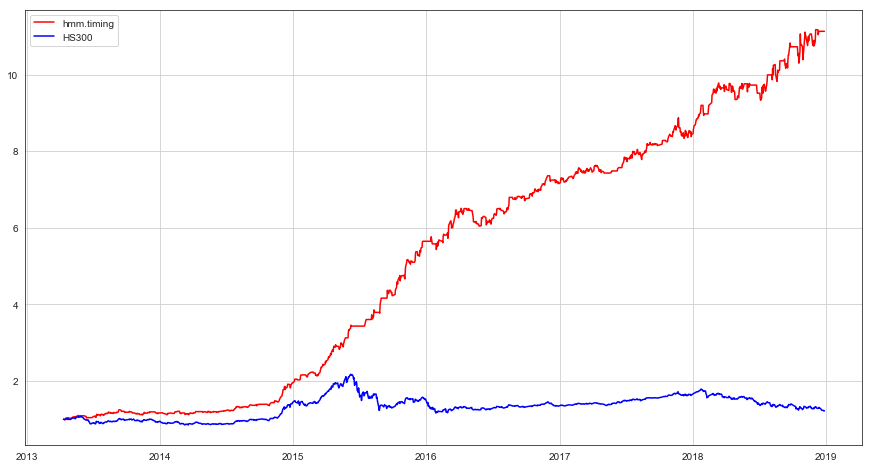

In [10]:

flag = 0
aList = []
dStart = 2005  #2013-4-12至2018-12-28
df=data
df['pnL'] = np.ones(len(df))
cdays=1       
b_rate=0.0001 
s_rate=0.0002 
for n in range(dStart,len(df)-1):  
    if n%cdays>0:
        if flag==1:
            df['pnL'][n+1] = df['pnL'][n]*df['return'][n]
        else:
            df['pnL'][n+1] = df['pnL'][n]
    else:
        sig = df['Signal'][n]
        if sig==1:
            if flag==0:          
                df['pnL'][n+1] = df['pnL'][n]*df['return'][n]*(1-b_rate)
                buy = df['open'][n+1]
            if flag==1:           
                df['pnL'][n+1] = df['pnL'][n]*df['return'][n]
            flag = 1     
        else:
            if flag==1:      
                df['pnL'][n+1] = df['pnL'][n]*(df['return'][n])*(1-s_rate)
                sell = df['open'][n+1]
                aList.append(sell/buy-1)
            if flag==0:         
                df['pnL'][n+1] = df['pnL'][n]   
            flag = 0
plt.figure(figsize = (15,8))
plt.plot(df['date'][dStart:],df['pnL'][dStart:],'r',label='hmm.timing')
plt.plot(df['date'][dStart:],df['close'][dStart:]/df['close'][dStart], 'b',label = 'HS300')
plt.grid(1)
plt.legend()